In [1]:
!wget download www.kasprowski.pl/datasets/emvic.zip

--2023-11-13 11:56:33--  http://download/
Resolving download (download)... failed: Nieznany host. .
wget: unable to resolve host address 'download'
--2023-11-13 11:56:35--  http://www.kasprowski.pl/datasets/emvic.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4295994 (4,1M) [application/zip]
Saving to: 'emvic.zip.2'

     0K .......... .......... .......... .......... ..........  1% 1,40M 3s
    50K .......... .......... .......... .......... ..........  2% 1,91M 2s
   100K .......... .......... .......... .......... ..........  3% 1,98M 2s
   150K .......... .......... .......... .......... ..........  4% 3,88M 2s
   200K .......... .......... .......... .......... ..........  5% 5,29M 2s
   250K .......... .......... .......... .......... ..........  7% 4,10M 2s
   300K .......... .......... .......... .......... ..........

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

Collect data

In [3]:
data = pd.read_table("emvic/emvic.data")

In [4]:
data

,a25,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,-20.12,-20.13,-20.14,-20.15,-19.11,-20.16,-22.5,-19.12,-22.6,-23.10
0,a25,0,0,0,0,0,0,0,0,0,...,-74,-73,-75,-73,-72,-72,-69,-67,-67,-70
1,a25,0,0,0,0,0,0,0,0,0,...,-51,-52,-54,-51,-54,-54,-54,-53,-52,-54
2,a25,0,0,0,0,0,0,0,0,0,...,74,74,74,74,74,74,75,71,76,74
3,a25,0,0,0,0,0,0,0,0,0,...,129,130,130,133,131,129,124,124,122,117
4,a25,0,0,0,0,0,0,0,0,0,...,-813,-813,-816,-817,-818,-818,-816,-818,-822,-824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,a41,0,0,0,0,0,0,0,0,0,...,83,81,80,82,80,82,82,80,81,79
411,a41,0,0,0,0,0,0,0,0,0,...,9,9,8,11,8,9,12,10,15,12
412,a41,0,0,0,0,0,0,0,0,0,...,223,223,222,223,225,227,230,229,227,226
413,a41,0,0,0,0,0,0,0,0,0,...,440,438,440,440,439,441,442,446,445,445


Analyze Data

415 [[0 0 0 ... -67 -67 -70]
 [0 0 0 ... -53 -52 -54]
 [0 0 0 ... 71 76 74]
 ...
 [0 0 0 ... 229 227 226]
 [0 0 0 ... 446 445 445]
 [0 0 0 ... 575 577 578]]


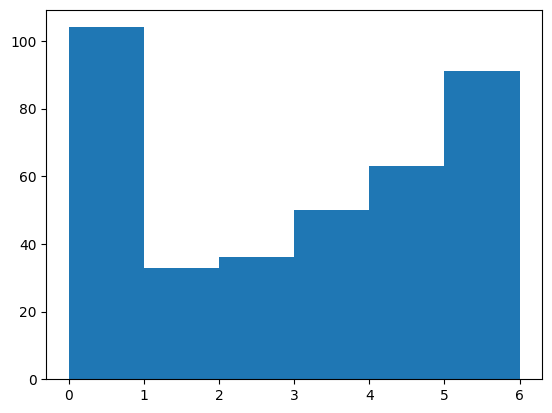

In [5]:
samples = data.values[:,1:]
labels = data.values[:,0]

enkoder = LabelEncoder()
liczby = enkoder.fit_transform(labels)

print(len(liczby), (samples))
plt.hist(liczby,bins=6,range=(0,6))
plt.show()

Train first model

In [6]:
model = KNeighborsClassifier()

model.fit(samples, liczby)

import random
for n in range(10):
    i = random.randrange(len(liczby))
    predicted = model.predict(samples[i].reshape(1,-1))
    print(n," predicted",predicted[0], "real",liczby[i], end=' ')
    if(predicted[0]==liczby[i]):
        print("correct")
    else:
        print("wrong")

0  predicted 0 real 0 correct
1  predicted 0 real 0 correct
2  predicted 6 real 6 correct
3  predicted 6 real 1 wrong
4  predicted 4 real 4 correct
5  predicted 6 real 6 correct
6  predicted 7 real 7 correct
7  predicted 2 real 2 correct
8  predicted 3 real 3 correct
9  predicted 0 real 0 correct


In [7]:
model_svm = svm.SVC(kernel='linear', C = 1.0)

model_svm.fit(samples, liczby)

import random
for n in range(10):
    i = random.randrange(len(liczby))
    predicted = model_svm.predict(samples[i].reshape(1,-1))
    print(n," predicted",predicted[0], "real",liczby[i], end=' ')
    if(predicted[0]==liczby[i]):
        print("correct")
    else:
        print("wrong")

0  predicted 0 real 0 correct
1  predicted 7 real 7 correct
2  predicted 5 real 5 correct
3  predicted 3 real 3 correct
4  predicted 0 real 0 correct
5  predicted 0 real 0 correct
6  predicted 7 real 7 correct
7  predicted 3 real 3 correct
8  predicted 2 real 2 correct
9  predicted 0 real 0 correct


Split data train-test

In [8]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, stratify=labels,random_state=1)

First model KNN

In [9]:
model.fit(trainSamples, trainLabels)    

correct = 0;
predictedLabels = model.predict(testSamples)
for i in range(len(testSamples)):
    #print("real:",testLabels[i],"predicted:",predictedLabels[i])
    if(testLabels[i]==predictedLabels[i]):
        correct = correct + 1
print("Correct:",correct," of ",len(testSamples)," accuracy=",correct/len(testSamples))

Correct: 59  of  104  accuracy= 0.5673076923076923


Second model SVM

In [10]:
model_svm.fit(trainSamples, trainLabels)    

correct = 0;
predictedLabels = model_svm.predict(testSamples)
for i in range(len(testSamples)):
    #print("real:",testLabels[i],"predicted:",predictedLabels[i])
    if(testLabels[i]==predictedLabels[i]):
        correct = correct + 1
print("Correct:",correct," of ",len(testSamples)," accuracy=",correct/len(testSamples))

Correct: 92  of  104  accuracy= 0.8846153846153846


First model KNN

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
modelResults = model.predict(testSamples)
print(confusion_matrix(testLabels, modelResults))
print(classification_report(testLabels, modelResults))
accuracy = accuracy_score(testLabels, modelResults) 
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults)))

[[24  0  0  0  2  0  0  0]
 [ 0  3  3  0  1  1  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 1  0  2  5  1  0  0  4]
 [ 2  1  3  2  6  0  1  1]
 [ 1  0  0  1  0  9  0  2]
 [ 0  3  1  1  2  0  2  1]
 [ 1  2  1  1  2  0  1  1]]
              precision    recall  f1-score   support

         a25       0.83      0.92      0.87        26
         a28       0.33      0.38      0.35         8
         a29       0.47      1.00      0.64         9
         a32       0.50      0.38      0.43        13
         a37       0.43      0.38      0.40        16
         a40       0.90      0.69      0.78        13
         a41       0.50      0.20      0.29        10
         a42       0.11      0.11      0.11         9

    accuracy                           0.57       104
   macro avg       0.51      0.51      0.49       104
weighted avg       0.57      0.57      0.55       104

Accuracy: 0.57
Cohen's Kappa: 0.49


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE=',mean_squared_error(enkoder.fit_transform(testLabels), enkoder.fit_transform(modelResults)))
print('R2=',r2_score(enkoder.fit_transform(testLabels), enkoder.fit_transform(modelResults)))

MSE= 5.105769230769231
R2= 0.07933914609139248


Second model SVM

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
modelResults = model_svm.predict(testSamples)
print(confusion_matrix(testLabels, modelResults))
print(classification_report(testLabels, modelResults))
accuracy = accuracy_score(testLabels, modelResults) 
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults)))

[[25  0  0  0  0  0  0  1]
 [ 0  6  2  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 12  0  0  1  0]
 [ 0  0  1  0 13  0  0  2]
 [ 0  0  0  0  0 12  1  0]
 [ 0  1  0  0  1  0  8  0]
 [ 2  0  0  0  0  0  0  7]]
              precision    recall  f1-score   support

         a25       0.93      0.96      0.94        26
         a28       0.86      0.75      0.80         8
         a29       0.75      1.00      0.86         9
         a32       1.00      0.92      0.96        13
         a37       0.93      0.81      0.87        16
         a40       1.00      0.92      0.96        13
         a41       0.80      0.80      0.80        10
         a42       0.70      0.78      0.74         9

    accuracy                           0.88       104
   macro avg       0.87      0.87      0.87       104
weighted avg       0.89      0.88      0.89       104

Accuracy: 0.88
Cohen's Kappa: 0.86


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE=',mean_squared_error(enkoder.fit_transform(testLabels), enkoder.fit_transform(modelResults)))
print('R2=',r2_score(enkoder.fit_transform(testLabels), enkoder.fit_transform(modelResults)))

def MSE_R2(testLabels, modelResults):
    print('MSE=',mean_squared_error(enkoder.fit_transform(testLabels), enkoder.fit_transform(modelResults)))
    print('R2=',r2_score(enkoder.fit_transform(testLabels), enkoder.fit_transform(modelResults)))
    print(confusion_matrix(testLabels, modelResults))
    print(classification_report(testLabels, modelResults))


MSE= 2.019230769230769
R2= 0.6358968374372739


Reduce data

In [15]:
df = pd.DataFrame(samples)
df_corr = df.corr()

In [16]:
df_corr, min(df_corr), max(df_corr)

(       0      1      2      3      4      5      6      7      8      9      \
 0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 3        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 4        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 12283    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 12284    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 12285    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 12286    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 12287    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 
        ...     12278     12279     12

In [17]:
correlation_threshold = 0.2 

# Choose features that is above correlation_threshold
high_corr_features = df_corr[df_corr.abs() > correlation_threshold].stack().index
selected_features = list(set([feature[0] for feature in high_corr_features] + [feature[1] for feature in high_corr_features]))

# Choose selected features from original data
df_selected = df[selected_features]


In [18]:
df_selected

,385,386,387,388,389,390,391,392,393,394,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0,0,0,0,2048,2048,2048,2048,2048,2048,...,-74,-73,-75,-73,-72,-72,-69,-67,-67,-70
1,0,0,0,0,0,0,0,0,2048,2048,...,-51,-52,-54,-51,-54,-54,-54,-53,-52,-54
2,0,0,0,0,0,0,0,2048,2048,2048,...,74,74,74,74,74,74,75,71,76,74
3,0,0,2048,2048,2048,2048,2048,2048,2048,2048,...,129,130,130,133,131,129,124,124,122,117
4,0,2048,2048,2048,2048,2048,2048,2048,2048,2048,...,-813,-813,-816,-817,-818,-818,-816,-818,-822,-824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,0,0,0,0,0,0,2048,2048,2048,2048,...,83,81,80,82,80,82,82,80,81,79
411,0,0,0,0,0,2048,2048,2048,2048,2048,...,9,9,8,11,8,9,12,10,15,12
412,0,0,0,0,0,0,0,0,2048,2048,...,223,223,222,223,225,227,230,229,227,226
413,0,0,0,0,0,0,0,0,0,2048,...,440,438,440,440,439,441,442,446,445,445


Prepare seven classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Inicjalizacja klasyfikatorów
rf_classifier   = ["RandomForestClassifier",    RandomForestClassifier()]
svc_classifier  = ["SVC",                       svm.SVC(kernel='linear', C = 1.0)] # SVC()
lr_classifier   = ["LogisticRegression",        LogisticRegression(solver='lbfgs', max_iter=1000)]
knn_classifier  = ["KNeighborsClassifier",      KNeighborsClassifier()]
dt_classifier   = ["DecisionTreeClassifier",    DecisionTreeClassifier()]
nb_classifier   = ["GaussianNB",                GaussianNB()]
mlp_classifier  = ["MLPClassifier",             MLPClassifier(max_iter=500)]

networks = [rf_classifier, svc_classifier, lr_classifier, knn_classifier, dt_classifier, nb_classifier, mlp_classifier]

(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(df_selected, labels, stratify=labels,random_state=1)


def  TEST(model, testLabels, testSamples):
    correct = 0;
    predictedLabels = model.predict(testSamples)
    for i in range(len(testSamples)):
        #print("real:",testLabels[i],"predicted:",predictedLabels[i])
        if(testLabels[i]==predictedLabels[i]):
            correct = correct + 1
    accuracy = correct/len(testSamples)
    # print("Correct:",correct," of ",len(testSamples)," accuracy=",correct/len(testSamples))
    return accuracy

Acc_array = []

for i, (name, model) in enumerate(networks):
    model.fit(trainSamples, trainLabels)
    Acc_array.append([i, name, TEST(model, testLabels, testSamples)])
    print(f"Index: {i}, Acc: {Acc_array[i]}")
    MSE_R2(testLabels, model.predict(testSamples))
    

Index: 0, Acc: [0, 'RandomForestClassifier', 0.7596153846153846]
MSE= 2.3846153846153846
R2= 0.5700115032592568
[[25  0  0  0  1  0  0  0]
 [ 0  5  2  0  1  0  0  0]
 [ 1  0  8  0  0  0  0  0]
 [ 3  0  0  6  3  0  0  1]
 [ 0  0  0  1 12  0  0  3]
 [ 0  0  0  1  0 11  1  0]
 [ 0  0  0  0  1  0  9  0]
 [ 2  0  0  0  4  0  0  3]]
              precision    recall  f1-score   support

         a25       0.81      0.96      0.88        26
         a28       1.00      0.62      0.77         8
         a29       0.80      0.89      0.84         9
         a32       0.75      0.46      0.57        13
         a37       0.55      0.75      0.63        16
         a40       1.00      0.85      0.92        13
         a41       0.90      0.90      0.90        10
         a42       0.43      0.33      0.38         9

    accuracy                           0.76       104
   macro avg       0.78      0.72      0.74       104
weighted avg       0.77      0.76      0.75       104

Index: 1, Acc: [1, '

In [114]:
import pandas as pd

data_analyze = pd.DataFrame(Acc_array, columns=["Index", "Name", "Value"]).sort_values(by="Value", ascending=False)
print(data_analyze)

index = np.array(data_analyze["Index"][0:3])
pick_netowkrs = []
for i in index:
    pick_netowkrs.append(networks[i])

print(pick_netowkrs)


   Index                    Name     Value
2      2      LogisticRegression  0.913462
1      1                     SVC  0.884615
6      6           MLPClassifier  0.855769
0      0  RandomForestClassifier  0.759615
3      3    KNeighborsClassifier  0.567308
4      4  DecisionTreeClassifier  0.500000
5      5              GaussianNB  0.480769
[['LogisticRegression', LogisticRegression(max_iter=1000)], ['SVC', SVC(kernel='linear')], ['MLPClassifier', MLPClassifier(max_iter=500)]]


Choose 3 best and perform cross valid.

In [115]:
# models num: 1, 3, 7
for (name, p_network) in pick_netowkrs:
    print(name, sklearn.model_selection.cross_validate(p_network, df_selected, labels, cv=10))


LogisticRegression {'fit_time': array([3.37290001, 3.69947505, 3.60909724, 3.50070047, 3.14517283,
       3.18234968, 3.34910536, 3.19660211, 3.71253729, 3.44337749]), 'score_time': array([0.05255389, 0.05774093, 0.05015349, 0.04447532, 0.04581809,
       0.04507685, 0.04606962, 0.0499351 , 0.04557562, 0.06288147]), 'test_score': array([0.9047619 , 0.95238095, 0.9047619 , 0.95238095, 0.83333333,
       0.87804878, 0.82926829, 0.95121951, 0.92682927, 0.90243902])}
SVC {'fit_time': array([0.47495937, 0.4186759 , 0.42346907, 0.41307068, 0.44865847,
       0.43215084, 0.45335793, 0.41664124, 0.42734361, 0.41604543]), 'score_time': array([0.09260321, 0.08324552, 0.08384895, 0.0841794 , 0.08467412,
       0.09648371, 0.08428216, 0.08563566, 0.08508587, 0.09104586]), 'test_score': array([0.80952381, 0.88095238, 0.88095238, 0.95238095, 0.85714286,
       0.85365854, 0.90243902, 0.87804878, 0.95121951, 0.92682927])}
MLPClassifier {'fit_time': array([ 5.54218578,  5.39432144,  4.90212083,  5.132

Disp result

In [116]:
for (name, p_network) in pick_netowkrs:
    print(f"model: {name}")
    for n in range(10):
        i = random.randrange(len(testSamples.values))
        predicted = p_network.predict(testSamples.values[i].reshape(1,-1))
        print(n," predicted",predicted[0], "real",testLabels[i], end=' ')
        if(predicted[0]==testLabels[i]):
            print("correct")
        else:
            print("wrong")

model: LogisticRegression
0  predicted a28 real a28 correct
1  predicted a29 real a28 wrong
2  predicted a25 real a25 correct
3  predicted a25 real a25 correct
4  predicted a40 real a40 correct
5  predicted a32 real a32 correct
6  predicted a42 real a42 correct
7  predicted a25 real a25 correct
8  predicted a32 real a32 correct
9  predicted a40 real a40 correct
model: SVC
0  predicted a32 real a32 correct
1  predicted a29 real a29 correct
2  predicted a37 real a37 correct
3  predicted a42 real a42 correct
4  predicted a25 real a25 correct
5  predicted a29 real a29 correct
6  predicted a29 real a29 correct
7  predicted a25 real a25 correct
8  predicted a41 real a41 correct
9  predicted a25 real a42 wrong
model: MLPClassifier
0  predicted a32 real a32 correct
1  predicted a32 real a32 correct
2  predicted a41 real a41 correct
3  predicted a37 real a29 wrong
4  predicted a25 real a25 correct
5  predicted a41 real a41 correct
6  predicted a37 real a37 correct
7  predicted a41 real a41 corr

In [151]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

accuracy_list = []

for features in range(600, 8001, 100):

    # Assuming you have a DataFrame df_selected and labels
    X_new = SelectKBest(score_func=f_classif, k=features).fit_transform(df_selected, labels)
    print(X_new.shape)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_new, labels, stratify=labels, random_state=1)

    acc = []
    for (name, net) in pick_netowkrs:
        net.fit(X_train, y_train)
        accuracy = net.score(X_test, y_test)
        acc.append(accuracy)


    accuracy_list.append([features, acc])

(415, 600)
(415, 700)
(415, 800)
(415, 900)
(415, 1000)
(415, 1100)
(415, 1200)
(415, 1300)
(415, 1400)
(415, 1500)
(415, 1600)
(415, 1700)
(415, 1800)
(415, 1900)
(415, 2000)
(415, 2100)
(415, 2200)
(415, 2300)
(415, 2400)
(415, 2500)
(415, 2600)
(415, 2700)
(415, 2800)
(415, 2900)
(415, 3000)
(415, 3100)
(415, 3200)
(415, 3300)
(415, 3400)
(415, 3500)
(415, 3600)
(415, 3700)
(415, 3800)
(415, 3900)
(415, 4000)
(415, 4100)
(415, 4200)
(415, 4300)
(415, 4400)
(415, 4500)
(415, 4600)
(415, 4700)
(415, 4800)
(415, 4900)
(415, 5000)
(415, 5100)
(415, 5200)
(415, 5300)
(415, 5400)
(415, 5500)
(415, 5600)
(415, 5700)
(415, 5800)
(415, 5900)
(415, 6000)
(415, 6100)
(415, 6200)
(415, 6300)
(415, 6400)
(415, 6500)
(415, 6600)
(415, 6700)
(415, 6800)
(415, 6900)
(415, 7000)
(415, 7100)
(415, 7200)
(415, 7300)
(415, 7400)
(415, 7500)
(415, 7600)
(415, 7700)
(415, 7800)
(415, 7900)
(415, 8000)


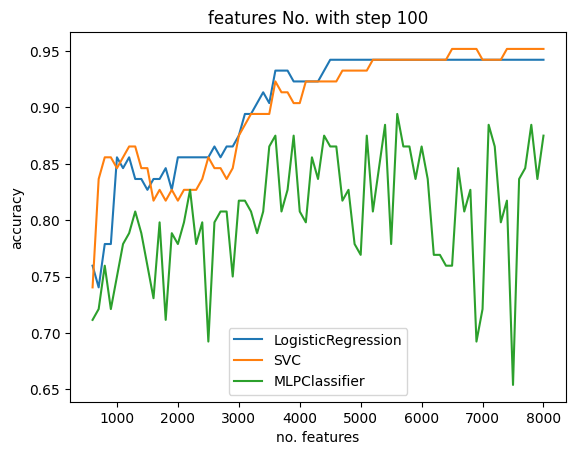

In [154]:
info = pd.DataFrame(accuracy_list, columns=["features", "accuracy"])
# Rozdzielenie kolumn
column1 = [sublist[0] for sublist in info["accuracy"]]
column2 = [sublist[1] for sublist in info["accuracy"]]
column3 = [sublist[2] for sublist in info["accuracy"]]

# Tworzenie wykresu
plt.plot(info["features"], column1, label=(pick_netowkrs[0])[0])
plt.plot(info["features"], column2, label=(pick_netowkrs[1])[0])
plt.plot(info["features"], column3, label=(pick_netowkrs[2])[0])

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.title("features No. with step 100")
plt.xlabel("no. features")
plt.ylabel("accuracy")
plt.show()